In [14]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline #needed to show plots in cells

In [12]:
APOGEE = fits.open('/Users/spardy/Research/data/APOGEE/allStar-v304.fits')

In [44]:
APOGEE[1].data

FITS_rec([ ('apogee.n.s.s3.4264.2M00000032+5737103', '4264.2M00000032+5737103', 'apogee.n.s.v304.4264.2M00000032+5737103', 'apStar-s3-2M00000032+5737103.fits', '2M00000032+5737103', 4264, 'N7789', 10.905, 0.023, 10.635, 0.029999999, 10.483, 0.022, 0.001335, 57.619529999999997, 116.06537094799999, -4.5647675140799997, 0.10556992, 'RJCE_WISE_PARTSKY', 0.12393039, -2147481600, 0, 'APOGEE_SHORT', 1, 0, 118.077, 0, '', 0, '', -20.387501, 0.0, 0.063114323, 0.063114323, -20.306068, 0.0, 0.063114323, 0.063114323, 6000.0, 4.0, -0.5, 30.105801, 22.937401, 0.0, array([-1., -1.], dtype=float32), array([-1., -1.], dtype=float32), array([-1., -1.], dtype=float32), array([-1., -1.], dtype=float32), 0.69599336, 's3', 'a3', 'v304', array([ -9.99999023e+03,  -9.99999023e+03,  -8.51968899e-02,
        -9.99999023e+03,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00], dtype=float32), array([  6.81910010e+03,   4.72709990e+00,  -8.51968899e-02,
        -1.75809994e-01,   0.00000000e+00,   0.000

In [151]:
vel = APOGEE[1].data['VHELIO_AVG']
v_scatter = APOGEE[1].data['VSCATTER']
v_err = APOGEE[1].data['VERR']

metals = APOGEE[1].data['METALS']
metals_err = APOGEE[1].data['METALS_ERR']

good_points = np.where((Metals > -1000) & (Metals < 90))[0]
# Looks like we have some strange outliers...
l = APOGEE[1].data['GLON']
b = APOGEE[1].data['GLAT']

ra = APOGEE[1].data['RA']
dec = APOGEE[1].data['DEC']

In [112]:
def plot_coords(RA,Dec,org=0,title='Mollweide projection', projection='mollweide',
                xlabel='RA', ylabel='DEC', **kwargs):
    ''' RA, Dec are arrays of the same length.
    RA takes values in [0,360), Dec in [-90,90],
    which represent angles in degrees.
    org is the origin of the plot, 0 or a multiple of 30 degrees in [0,360).
    title is the title of the figure.
    projection is the kind of projection: 'mollweide', 'aitoff', 'hammer', 'lambert'
    From: http://balbuceosastropy.blogspot.com/2013/09/the-mollweide-projection.html
    '''
    x = np.remainder(RA+360-org,360) # shift RA values
    ind = x>180
    x[ind] -=360    # scale conversion to [-180, 180]
    x=-x    # reverse the scale: East to the left
    tick_labels = np.array([150, 120, 90, 60, 30, 0, 330, 300, 270, 240, 210])
    tick_labels = np.remainder(tick_labels+360+org,360)
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111, projection=projection, axisbg ='LightCyan')
    ax.scatter(np.radians(x),np.radians(Dec), **kwargs)  # convert degrees to radians
    ax.set_xticklabels(tick_labels)     # we add the scale on the x axis
    ax.set_title(title)
    ax.title.set_fontsize(15)
    ax.set_xlabel(xlabel)
    ax.xaxis.label.set_fontsize(12)
    ax.set_ylabel(ylabel)
    ax.yaxis.label.set_fontsize(12)
    ax.grid(True)

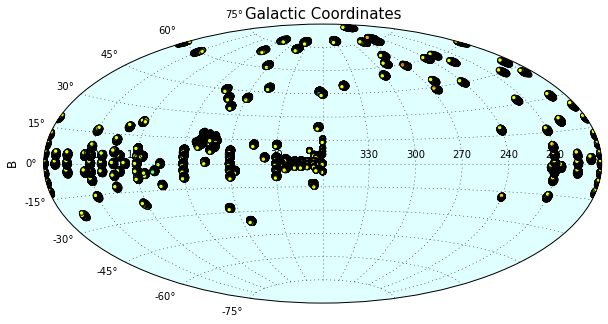

In [152]:
plot_coords(l, b, projection='aitoff', title='Galactic Coordinates', xlabel='L', ylabel='B', c=vel)

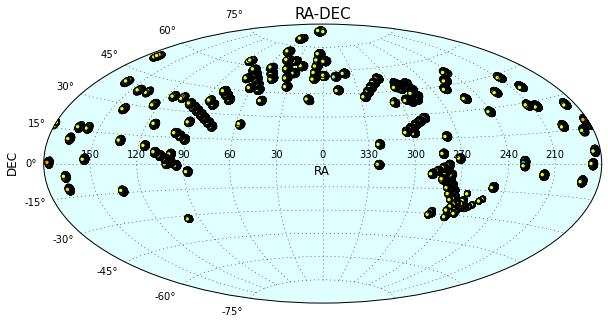

In [149]:
plot_coords(RA, DEC, projection='aitoff', title='RA-DEC', xlabel='RA', ylabel='DEC', c=Vel)

###Now plot these as density

In [145]:
x = np.remainder(L+360,360) # shift RA values
ind = x>180
x[ind] -=360    # scale conversion to [-180, 180]
x=-x    # reverse the scale: East to the left

hist,xedges,yedges = np.histogram2d(B,x,bins=[100,100],range=[[-90,90],[-180,180]])
X,Y = np.meshgrid(np.radians(yedges),np.radians(xedges))


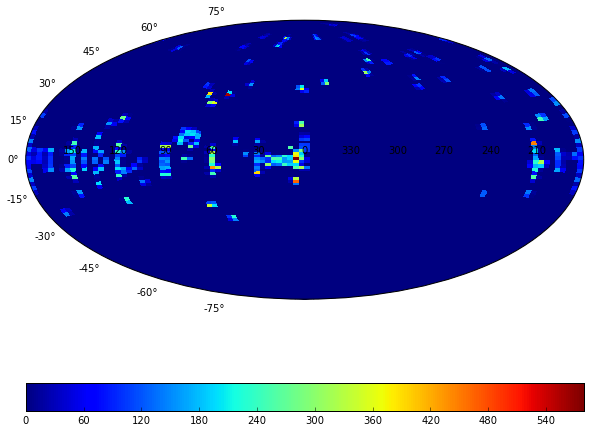

In [146]:
tick_labels = np.array([150, 120, 90, 60, 30, 0, 330, 300, 270, 240, 210])
tick_labels = np.remainder(tick_labels+360,360)
fig = plt.figure(figsize=(10,10))
axis = fig.add_subplot(111, projection='aitoff')
axis.grid(True)
# Apparently axis.imshow doesn't work well on 
image = axis.pcolormesh(X,Y,hist)
axis.set_xticklabels(tick_labels)     # we add the scale on the x axis
cb = fig.colorbar(image, orientation='horizontal')


<Container object of 3 artists>

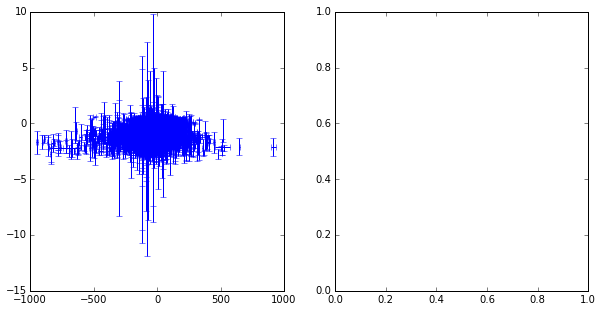

In [109]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes = axes.flatten()
axes[0].errorbar(Vel[good_points], Metals[good_points],
                 xerr=Verr[good_points], yerr=Metalserr[good_points], color='blue', linestyle='none')